# Numerical Precision

In this section, you will investigate how different convolution
and matrix-matrix multiplication kernel performs when changing the
numerical precision.

## 1. Set-up

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Make sure your token is stored in a txt file at the location below.
# This way there is no risk that you will push it to your repo
# Never share your token with anyone, it is basically your github password!
with open('/content/gdrive/MyDrive/ece5545/token.txt') as f:
    token = f.readline().strip()
# Use another file to store your github username
with open('/content/gdrive/MyDrive/ece5545/user.txt') as f:
    handle = f.readline().strip()

In [3]:
# Clone your github repo
YOUR_TOKEN = token
YOUR_HANDLE = handle
BRANCH = "main"

%mkdir /content/gdrive/MyDrive/ece5545
%cd /content/gdrive/MyDrive/ece5545
!git clone https://{YOUR_TOKEN}@github.com/ML-HW-SYS/a4-{YOUR_HANDLE}.git
%cd /content/gdrive/MyDrive/ece5545/a4-{YOUR_HANDLE}
!git checkout {BRANCH}
!git pull
%cd /content/gdrive/MyDrive/ece5545

PROJECT_ROOT = f"/content/gdrive/MyDrive/ece5545/a4-{YOUR_HANDLE}"

mkdir: cannot create directory ‘/content/gdrive/MyDrive/ece5545’: File exists
/content/gdrive/MyDrive/ece5545
fatal: destination path 'a4-ethanglaser' already exists and is not an empty directory.
/content/gdrive/MyDrive/ece5545/a4-ethanglaser
M	1-numerical_precision.ipynb
M	mnist.py
M	src/conv2d.py
M	src/matmul.py
M	tests/test_conv2d.py
Already on 'main'
Your branch is up to date with 'origin/main'.
Already up to date.
/content/gdrive/MyDrive/ece5545


In [4]:
# This extension reloads all imports before running each cell
%load_ext autoreload
%autoreload 2

Verify the following cell prints your github repository.

In [5]:
!ls {PROJECT_ROOT}

1-numerical_precision.ipynb  data	  mnist.py     README.md  tests
2-svd_rank.ipynb	     mnist_fc.pt  __pycache__  src


In [6]:
!pip install torch numpy matplotlib

# 2. Convolution

In the following cell(s), please plot the reconstruction error of an
approximated tensor (in the y-axis) with the numerical precision
(in the x-axis). Please show one plot for `winograd` and one plot for `fft`.

In [7]:
%cd a4-ethanglaser/
from src.conv2d import conv2d
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

precisions = [torch.float64, torch.float32, torch.int64, torch.int32, torch.int16, torch.int8]
strings = ['float64', 'float32', 'int64', 'int32', 'int16', 'int8']
def get_error(method, precision, input_size, int_type):
    if int_type:
        x = torch.randint(-3,3, size=(input_size, input_size), dtype=precision)
        k = torch.randint(-3,3, size=(3, 3), dtype=precision)
        b = torch.randint(-3,3, size=(1,), dtype=precision)
    else:
        x = torch.rand((input_size, input_size), dtype=precision) * 3
        k = torch.rand(3, 3, dtype=precision) * 3
        b = torch.rand(size=(1,), dtype=precision) * 3


    ans = conv2d(x, k, b, method='torch').float()
    out = conv2d(x, k, b, method=method).float()
    return F.l1_loss(ans, out).item()

/content/gdrive/MyDrive/ece5545/a4-ethanglaser


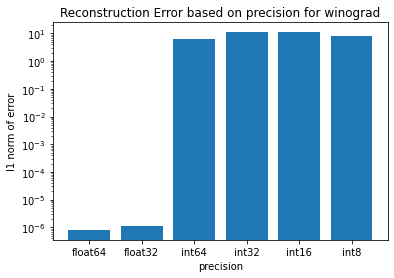

In [8]:
errors = []
for i, p in enumerate(precisions):
    errors.append(get_error("winograd", p, 15, i > 1))

plt.bar(strings, errors)
plt.title("Reconstruction Error based on precision for winograd")
plt.xlabel("precision")
plt.ylabel("l1 norm of error")
plt.yscale("log")
plt.show()

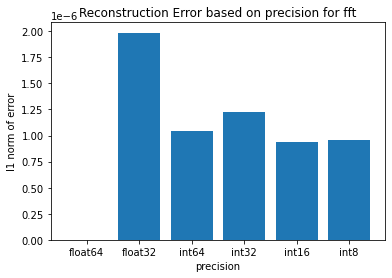

In [18]:
errors = []
for i, p in enumerate(precisions):
    errors.append(get_error("fft", p, 15, i > 1))

plt.bar(strings, errors)
plt.title("Reconstruction Error based on precision for fft")
plt.xlabel("precision")
plt.ylabel("l1 norm of error")
plt.show()

# 3. Matrix-matrix Multiply

In the following cell(s), please plot the reconstruction error (in the y-axis)
with the different numerical precisions (in the x-axis) for `log` (i.e.
logorithmic matrix-matrix multiplication).

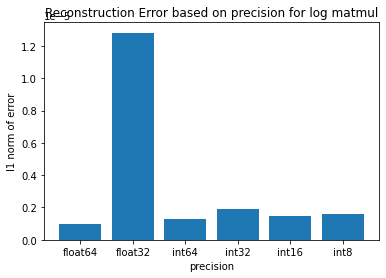

In [10]:
from src.matmul import matmul

def get_matmul_error(M, N, K, precision, int_type):
    if int_type:
        A = torch.randint(-5, 5, size=(M, N), dtype=precision)
        B = torch.randint(-5, 5, size=(N, K), dtype=precision)
    else:
        A = torch.randn(M, N, dtype=precision) * 5
        B = torch.randn(N, K, dtype=precision) * 5
    ans = matmul(A, B, method='torch')
    out = matmul(A, B, method='log')
    return F.l1_loss(ans.float(), out.float()).item()

errors = []
for i, p in enumerate(precisions):
    errors.append(get_matmul_error(3,10,3, p, i > 1))

plt.bar(strings, errors)
plt.title("Reconstruction Error based on precision for log matmul")
plt.xlabel("precision")
plt.ylabel("l1 norm of error")
plt.show()

In [21]:
# PART 5
from mnist import *


In [12]:
!python mnist.py

True
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.295091
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.868421
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.477974
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.639343
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.566819
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.379255
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.409109
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.252043
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.524463
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.123931
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.258341
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.414283
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.356876
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.379332
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.202911
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.419536
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.136566
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.491086
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.113257
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.097736
Train Epoch: 1 [12800/60

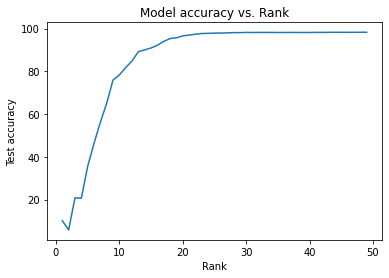

In [29]:
from torchvision import datasets, transforms
from mnist import *

def part_5(model, ranks):
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
    test_kwargs = {'batch_size': 1000}
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.load_state_dict(torch.load("mnist_fc.pt"))
    dataset2 = datasets.MNIST('data', train=False,
                       transform=transform)
    test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)
    accs = []
    for rank in ranks:
        current_model = SVDNet(rank)
        current_model.fc1.weight = model.fc1.weight
        current_model.fc2.weight = model.fc2.weight
        current_model.fc3.weight = model.fc3.weight
        accs.append(test(current_model, device, test_loader))
    return accs


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NormalNet().to(device)
ranks = list(range(1,50))
accs = part_5(model, ranks)
plt.figure()
plt.title("Model accuracy vs. Rank")
plt.plot(ranks, accs)
plt.xlabel("Rank")
plt.ylabel("Test accuracy")
plt.show()

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
